### This program serves to build a Radiative Convective model as part of Climate Dynamics assignment 3.

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [8]:
# variables we have to play with:
z = 10 #km 

# listing of variables:
So = 240 # top of atmosphere radiation (W m−2)
tao_inf = 2.8
rho_0 = 1.2 # density of air at sea level (kg m-3)
#rho_a = rho_a0*exp(-z/H)
h = 3 # km 
sigma = 5.67e-8 #Wm−2K−4
LR = 0.6 * (-9.81/1004) #K m−1
k = 37.0 # Wm−2K−1
Cp = 1004 # J kg−1K−1
H = 8 #km 
rho = rho_0*np.exp(-z/H)




In [25]:
A = 'bouy'

In [26]:
a = 5

In [27]:
a == A

False

In [9]:
T_surf = ((So/sigma)*(0.5*(tao_inf*np.exp(-z/H)) + 1))**(1/4)

In [10]:
T_test = []

for z in range(0, 20):
    T_test_calc = ((So/sigma)*(0.5*(tao_inf*np.exp(-z/H)) + 1))**(1/4)
    T_test.append(T_test_calc)

In [11]:
tao_values = np.arange(0, 20, 1)
tao_values.shape

(20,)

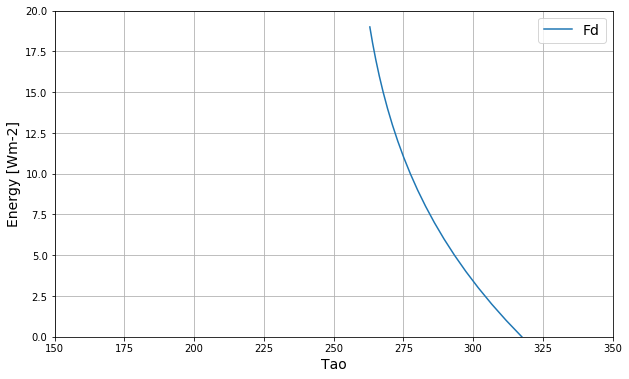

In [12]:
fig, ax = plt.subplots(figsize = (10,6))

plt.plot(T_test, tao_values)
#plt.plot(T_surf, tao_values)
#ax.set_title('Optical Thickness', fontsize = 16)
ax.set_xlabel('Tao', fontsize = 14)
ax.set_ylabel('Energy [Wm-2]', fontsize = 14);
ax.grid()
ax.set_ylim(0, 20);
ax.set_xlim(150, 350)
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax.legend(['Fd'], fontsize = 14)



In [13]:
# 1.a.i
z = 10
tao_z = tao_inf*(1 - np.exp(-z/h))
tao_z

2.700112818627693

In [14]:
# 1.a.ii
tao_m = np.linspace(0,tao_z, 11)
tao_m

array([0.        , 0.27001128, 0.54002256, 0.81003385, 1.08004513,
       1.35005641, 1.62006769, 1.89007897, 2.16009025, 2.43010154,
       2.70011282])

In [15]:
# solve for z from tao_z equation

z_m = []

for z in np.linspace(0, 2.7, 11):
    z_calc_test = -h*(np.log(1 - (z/tao_inf)))
    z_m.append(z_calc_test)
    
z_m

[-0.0,
 0.3042003433251881,
 0.6427638116908911,
 1.0244543353342719,
 1.46188537906739,
 1.9741675822460258,
 2.5923149361107547,
 3.3717902899571994,
 4.427719559428735,
 6.071615071575079,
 9.996613530525622]

In [16]:
# 1.a.iii
# compute T at each height (z_m) of optical thickness (tao_m) within this mixed layer 

T_m = []

for tao_z in np.linspace(0, 2.7, 11):
    tao_z_calc_test = -h*(np.log(1 - (tao_z/tao_inf)))
    T = ((So/sigma)*(0.5*(tao_inf*np.exp(-tao_z_calc_test/h)) + 0.5))**(1/4)
    T_m.append(T)
    
T_m

# this is radiative eq temp, now want mixed layer linear decreasing T

[299.46456866315015,
 293.99721955116223,
 288.20661643549477,
 282.0443108023896,
 275.44936327242715,
 268.34349252834426,
 260.6235584599731,
 252.14937069504956,
 242.72276389446688,
 232.04899325825053,
 219.65835054401276]

In [50]:
T_m_adj = T_m[-1] + LR*(z_m-z_m[-1])*1000 # calculated adjusted temperature with dynamically relaxed lapse rate 

In [18]:
# 1.a.iv.
# define f_d

Fd = So*(0.5*(tao_inf - tao_m[-1]))
Fd

11.986461764676815

In [19]:
tao_z

2.7

In [20]:
tao_m

array([0.        , 0.27001128, 0.54002256, 0.81003385, 1.08004513,
       1.35005641, 1.62006769, 1.89007897, 2.16009025, 2.43010154,
       2.70011282])

In [35]:
LHS = Fd*np.exp(tao_m[] + tao_m[-1]) 

In [38]:
Fd

11.986461764676815

In [39]:
tao_m[-1]

2.700112818627693

In [41]:
tao_m

array([0.        , 0.27001128, 0.54002256, 0.81003385, 1.08004513,
       1.35005641, 1.62006769, 1.89007897, 2.16009025, 2.43010154,
       2.70011282])

In [86]:
pwd


'/Users/ariannavaruolo/research_notebooks/climate_dynamics'

In [21]:
tao_m

array([0.        , 0.27001128, 0.54002256, 0.81003385, 1.08004513,
       1.35005641, 1.62006769, 1.89007897, 2.16009025, 2.43010154,
       2.70011282])

In [51]:
T_m_adj

array([278.26399521, 276.48060554, 274.49576035, 272.25808065,
       269.69361937, 266.69033944, 263.06641979, 258.49670671,
       252.30626878, 242.66884948, 219.65835054])

In [56]:
range(m,10)

range(10, 10)

In [60]:
Fd

11.986461764676815

In [ ]:
# 1.a.iv.
# define f_d

Fd = So*(0.5*(tao_inf - tao_m[-1]))
Fd

In [58]:
# 1.a.iv.

Fd_int = []
for m in range(len(tao_m)-1):
    test_sum = Fd*np.exp(tao_m[m] - tao_m[-1]) 
    for j in range(m,10):
        test_sum += 0.5*(sigma*T_m_adj[j]**4 * np.exp(tao_m[m] - tao_m[j]) + sigma*T_m_adj[j+1]**4 * np.exp(tao_m[m] - tao_m[j+1])) * (tao_m[j+1] - tao_m[j])
    Fd_int.append(test_sum)
    

In [59]:
Fd_int

[288.49945135089934,
 273.07765488551973,
 255.67261075964498,
 235.93679230098172,
 213.47947352488927,
 187.8815171865188,
 158.73477806159266,
 125.73630256538007,
 88.91822832196851,
 49.29946492631274]

In [61]:
Fd_int.append(Fd)

In [85]:
Fd_int

[288.49945135089934,
 273.07765488551973,
 255.67261075964498,
 235.93679230098172,
 213.47947352488927,
 187.8815171865188,
 158.73477806159266,
 125.73630256538007,
 88.91822832196851,
 49.29946492631274,
 11.986461764676815]

In [91]:
T_m_adj[0]

278.2639952060385

In [90]:
T_b = (So + Fd_int[0] - (sigma*(T_m_adj[0]**4)))/(4 * sigma * (T_m_adj[0]**3) + k) + T_m_adj[0]  
#T_b = So + Fd_int[0] - ((sigma*(T_m_adj[0])**4)/(4 * sigma * T_m**3 + k)) + T_m  
T_b

282.76548615549865

In [105]:
# calc upward longwave flux at the surface 
Fu_sfc = sigma*(T_m_adj[0]**4) + (4*sigma*(T_m_adj[0]**3))*(T_b - T_m_adj[0])
Fu_sfc

#tao_m is the grid of each layer
#tao_M is the top layer or bottom layer

361.94428622087327

In [263]:
T_m_adj

array([278.26399521, 276.48060554, 274.49576035, 272.25808065,
       269.69361937, 266.69033944, 263.06641979, 258.49670671,
       252.30626878, 242.66884948, 219.65835054])

In [264]:
tao_m

array([0.        , 0.27001128, 0.54002256, 0.81003385, 1.08004513,
       1.35005641, 1.62006769, 1.89007897, 2.16009025, 2.43010154,
       2.70011282])

In [383]:
# 1.a.vi.

Fu_int = []

test_sum_Fu = Fu_sfc*np.exp(-tao_m)
for m in range(len(tao_m)-1, 0, -1):
    test_sum_Fu_test = 0
    for j in range(1,m+1):
        test_sum_Fu_test += 0.5*(sigma*(T_m_adj[j]**4) * np.exp(tao_m[j] - tao_m[m]) + sigma*(T_m_adj[j-1]**4) * np.exp(tao_m[j-1] - tao_m[m])) * (tao_m[j] - tao_m[j-1])
    Fu_int.append(test_sum_Fu_test+test_sum_Fu[m])
    
    #x2 = Fu_int[2:len(Fu_int)] + Fu_sfc*np.exp(-tao_m[m]) 
    #x.append(x2)

In [385]:
Fu_int.append(Fu_sfc)
Fu_test = Fu_int[::-1]
Fu_test

[361.94428622087327,
 356.0619079534105,
 349.4112413647854,
 341.9644525553635,
 333.64877442661657,
 324.3341846701189,
 313.80730278931077,
 301.7154627896572,
 287.43217454441213,
 269.6429203059305,
 243.92236904930306]

In [148]:
range(len(tao_m)-1, 0)

range(10, 0)

In [217]:
for m in range(len(tao_m), 1, -1):
    print (m)

11
10
9
8
7
6
5
4
3
2


In [202]:
for m in range(10, 1, -1):
    print (m)

10
9
8
7
6
5
4
3
2


In [386]:
pwd


'/Users/ariannavaruolo/research_notebooks/climate_dynamics'